<a href="https://colab.research.google.com/github/nfahrisalim/Analisis-pangan-/blob/main/Pangan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import glob
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.regularizers import l2


data_path = '/content/drive/MyDrive/Pangan'

In [ ]:
# Cari semua file CSV dalam folder 'data/'
csv_files = glob.glob('/content/drive/MyDrive/Pangan/*.csv')

# Tampilkan daftar file yang ditemukan
print(csv_files)


['/content/drive/MyDrive/Pangan/Harga Beras Premium Sulawesi.csv', '/content/drive/MyDrive/Pangan/Harga Tepung Terigu (Curah) Sulawesi.csv', '/content/drive/MyDrive/Pangan/Harga Telur Ayam Ras Sulawesi.csv', '/content/drive/MyDrive/Pangan/Harga Minyak Goreng Kemasan Sulawesi.csv', '/content/drive/MyDrive/Pangan/Harga Gula Konsumsi Sulawesi.csv']


In [ ]:
# List untuk menampung setiap DataFrame
gabung = []

# Loop membaca setiap file CSV
for file in csv_files:
    df = pd.read_csv(file)
    gabung.append(df)

# Gabungkan semua DataFrame jadi satu
combined_df = pd.concat(gabung, ignore_index=True)

# Tampilkan 5 baris pertama
print(combined_df.head())
print(combined_df.shape)


      Tanggal      Komoditas           Provinsi    Harga
0  25/03/2022  Beras Premium          Gorontalo  11230.0
1  25/03/2022  Beras Premium     Sulawesi Barat  11250.0
2  25/03/2022  Beras Premium   Sulawesi Selatan  10950.0
3  25/03/2022  Beras Premium    Sulawesi Tengah  11961.0
4  25/03/2022  Beras Premium  Sulawesi Tenggara  11787.0
(32910, 4)


In [ ]:
print(combined_df.info())
print(combined_df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tanggal    32910 non-null  object 
 1   Komoditas  32910 non-null  object 
 2   Provinsi   32910 non-null  object 
 3   Harga      31671 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.0+ MB
None
              Harga
count  31671.000000
mean   17848.486123
std     6698.183930
min     8000.000000
25%    12400.000000
50%    16000.000000
75%    20031.000000
max    40000.000000
Tanggal        0
Komoditas      0
Provinsi       0
Harga        238
dtype: int64


In [ ]:
df = df.dropna(subset=['Harga'])
print(df.isna().sum())


Tanggal      0
Komoditas    0
Provinsi     0
Harga        0
dtype: int64


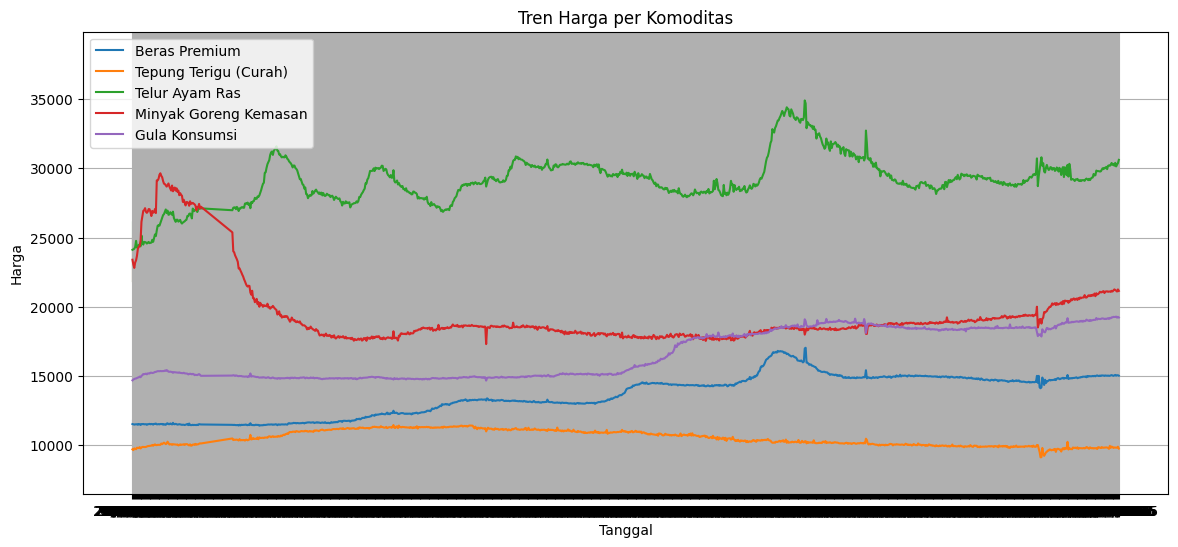

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_df, x='Tanggal', y='Harga', hue='Komoditas')
plt.title('Tren Harga per Komoditas')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

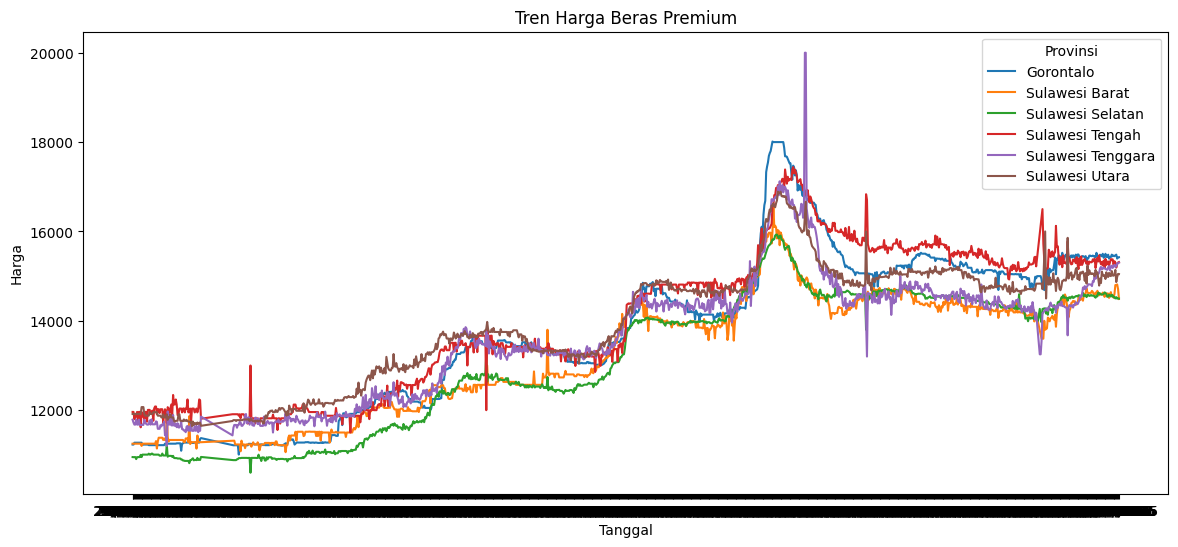

In [ ]:
komoditas_tertentu = 'Beras Premium'
subset = combined_df[combined_df['Komoditas'].str.contains(komoditas_tertentu)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=subset, x='Tanggal', y='Harga', hue='Provinsi')
plt.title(f'Tren Harga {komoditas_tertentu}')
plt.show()


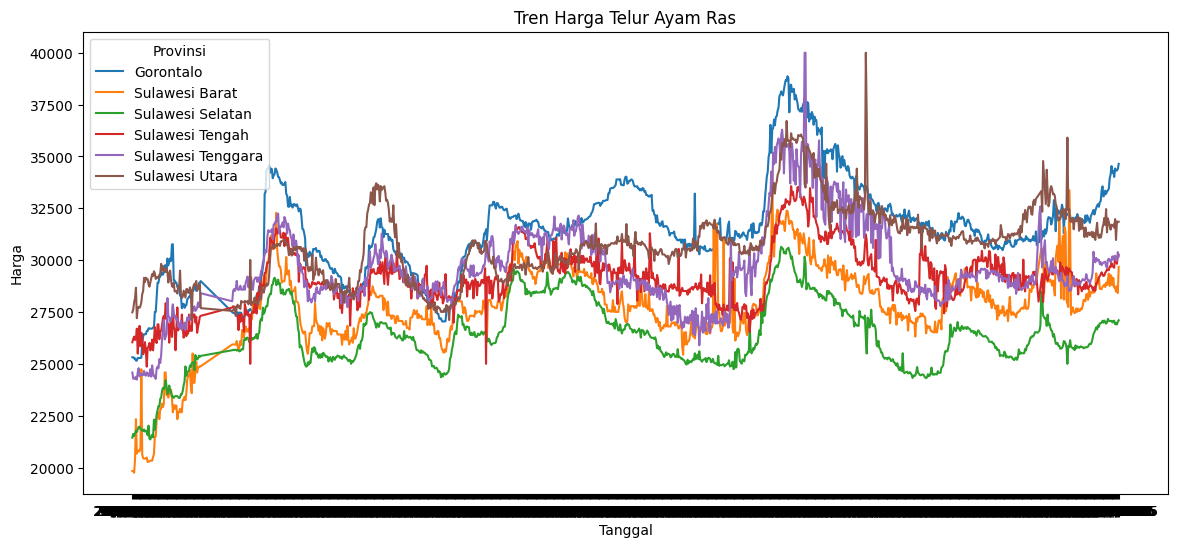

In [ ]:
komoditas_tertentu = 'Telur Ayam Ras'
subset = combined_df[combined_df['Komoditas'].str.contains(komoditas_tertentu)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=subset, x='Tanggal', y='Harga', hue='Provinsi')
plt.title(f'Tren Harga {komoditas_tertentu}')
plt.show()


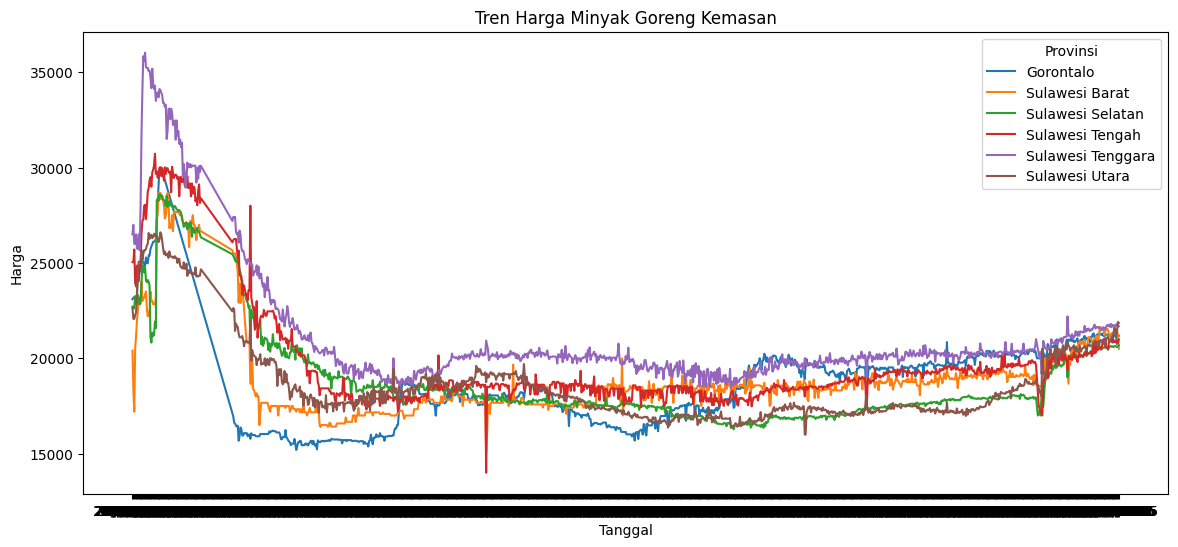

In [ ]:
komoditas_tertentu = 'Minyak Goreng Kemasan'
subset = combined_df[combined_df['Komoditas'].str.contains(komoditas_tertentu)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=subset, x='Tanggal', y='Harga', hue='Provinsi')
plt.title(f'Tren Harga {komoditas_tertentu}')
plt.show()


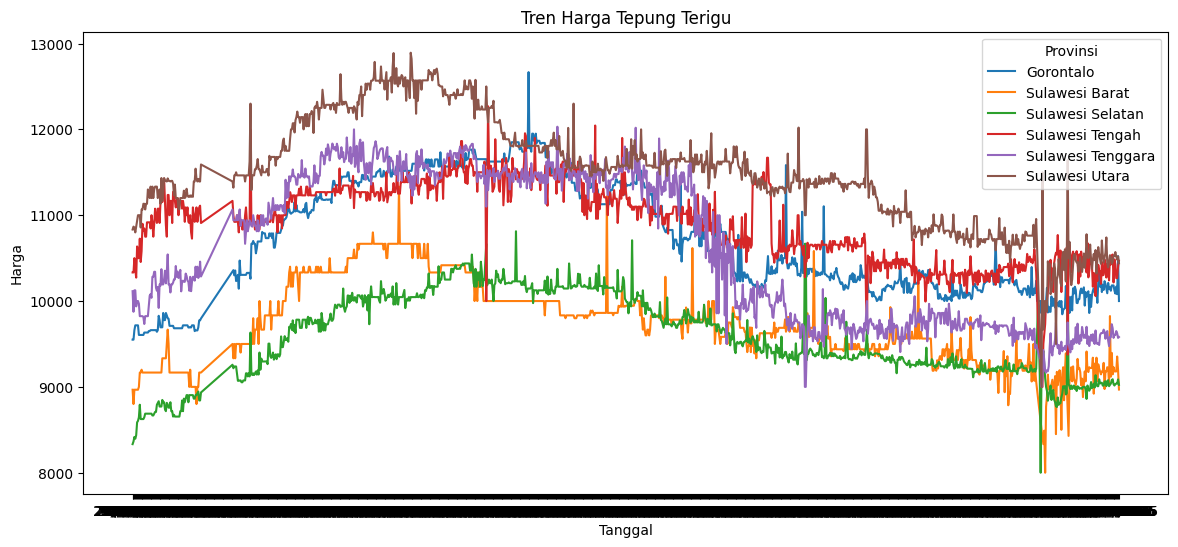

In [ ]:
komoditas_tertentu = 'Tepung Terigu'
subset = combined_df[combined_df['Komoditas'].str.contains(komoditas_tertentu)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=subset, x='Tanggal', y='Harga', hue='Provinsi')
plt.title(f'Tren Harga {komoditas_tertentu}')
plt.show()


In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)
df.head()

<ipython-input-97-16df7fc7bb8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)


,Tanggal,Komoditas,Provinsi,Harga
0,2022-03-25,Gula Konsumsi,Gorontalo,14444.0
1,2022-03-25,Gula Konsumsi,Sulawesi Barat,14583.0
2,2022-03-25,Gula Konsumsi,Sulawesi Selatan,14375.0
3,2022-03-25,Gula Konsumsi,Sulawesi Tengah,15083.0
4,2022-03-25,Gula Konsumsi,Sulawesi Tenggara,14844.0


In [ ]:
df = df.sort_values(['Komoditas', 'Provinsi', 'Tanggal'])
df.head()

,Tanggal,Komoditas,Provinsi,Harga
0,2022-03-25,Gula Konsumsi,Gorontalo,14444.0
6,2022-03-26,Gula Konsumsi,Gorontalo,14472.0
12,2022-03-27,Gula Konsumsi,Gorontalo,14500.0
18,2022-03-28,Gula Konsumsi,Gorontalo,14611.0
24,2022-03-29,Gula Konsumsi,Gorontalo,14639.0


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['Komoditas', 'Provinsi']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Komoditas', 'Provinsi']))

df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
df.head()

,Tanggal,Komoditas,Provinsi,Harga,Komoditas_Gula Konsumsi,Provinsi_Gorontalo,Provinsi_Sulawesi Barat,Provinsi_Sulawesi Selatan,Provinsi_Sulawesi Tengah,Provinsi_Sulawesi Tenggara,Provinsi_Sulawesi Utara
0,2022-03-25,Gula Konsumsi,Gorontalo,14444.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2022-03-26,Gula Konsumsi,Gorontalo,14472.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2022-03-27,Gula Konsumsi,Gorontalo,14500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2022-03-28,Gula Konsumsi,Gorontalo,14611.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2022-03-29,Gula Konsumsi,Gorontalo,14639.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaler = MinMaxScaler()
df['harga_scaled'] = scaler.fit_transform(df[['Harga']])
df.head()

,Tanggal,Komoditas,Provinsi,Harga,Komoditas_Gula Konsumsi,Provinsi_Gorontalo,Provinsi_Sulawesi Barat,Provinsi_Sulawesi Selatan,Provinsi_Sulawesi Tengah,Provinsi_Sulawesi Tenggara,Provinsi_Sulawesi Utara,harga_scaled
0,2022-03-25,Gula Konsumsi,Gorontalo,14444.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.060187
1,2022-03-26,Gula Konsumsi,Gorontalo,14472.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.063983
2,2022-03-27,Gula Konsumsi,Gorontalo,14500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.067778
3,2022-03-28,Gula Konsumsi,Gorontalo,14611.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.082825
4,2022-03-29,Gula Konsumsi,Gorontalo,14639.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.086621


In [ ]:
df_group = df.drop(['Komoditas', 'Provinsi', 'Harga'], axis=1)
df_group.head()

,Tanggal,Komoditas_Gula Konsumsi,Provinsi_Gorontalo,Provinsi_Sulawesi Barat,Provinsi_Sulawesi Selatan,Provinsi_Sulawesi Tengah,Provinsi_Sulawesi Tenggara,Provinsi_Sulawesi Utara,harga_scaled
0,2022-03-25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.060187
1,2022-03-26,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.063983
2,2022-03-27,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.067778
3,2022-03-28,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.082825
4,2022-03-29,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.086621


In [ ]:
def create_multistep_sequences(df_group, time_steps=30, future_steps=30):
    X, y = [], []

    # Ambil hanya kolom numerik selain target dan tanggal
    feature_cols = df_group.select_dtypes(include=['number']).columns
    feature_cols = feature_cols.drop(['harga_scaled'])  # harga_scaled hanya sebagai target

    features = df_group[feature_cols].values.astype(np.float32)
    target = df_group['harga_scaled'].values.astype(np.float32)

    for i in range(len(df_group) - time_steps - future_steps):
        X.append(features[i:i+time_steps])
        y.append(target[i + time_steps : i + time_steps + future_steps])
    return X, y


X_all, y_all = [], []
for (komoditas, provinsi), group in df.groupby(['Komoditas', 'Provinsi']):
    group = group.reset_index(drop=True)
    X, y = create_multistep_sequences(group)
    X_all.extend(X)
    y_all.extend(y)

X = np.array(X_all, dtype=np.float32)
y = np.array(y_all, dtype=np.float32)

In [ ]:
print(X)
print(y)

[[[1.4444e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.4472e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.4500e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  ...
  [1.5244e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.5300e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.5300e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]

 [[1.4472e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.4500e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.4611e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  ...
  [1.5300e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.5300e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.5361e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]

 [[1.4500e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.4611e+04 1.0000e+

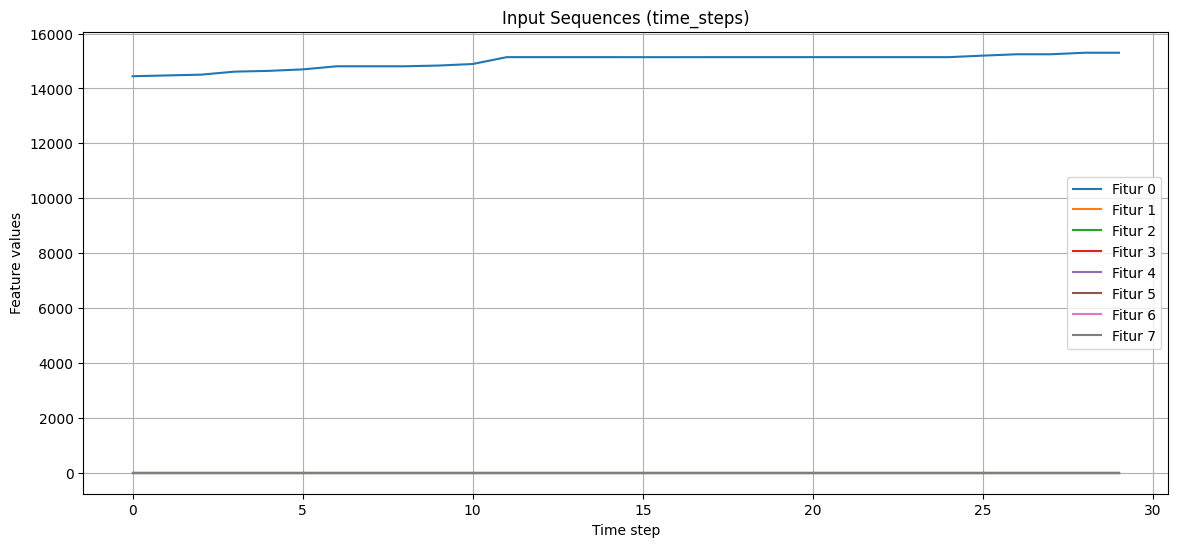

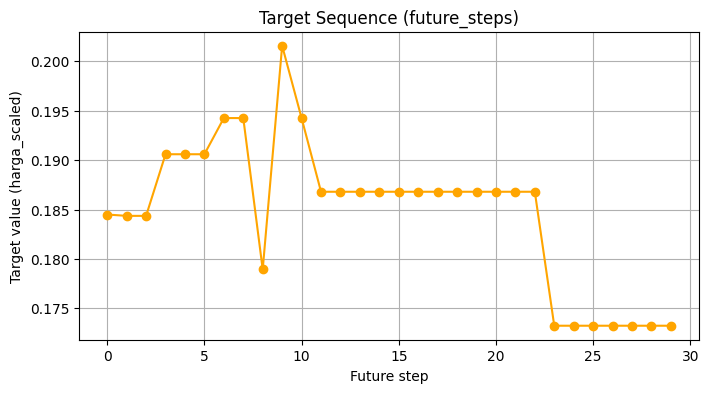

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih salah satu sample untuk divisualisasikan
sample_idx = 0
sample_input = X[sample_idx]        # shape: (time_steps, num_features)
sample_output = y[sample_idx]       # shape: (future_steps,)

# Visualisasi fitur input
plt.figure(figsize=(14, 6))
for i in range(sample_input.shape[1]):
    plt.plot(range(len(sample_input)), sample_input[:, i], label=f'Fitur {i}')
plt.title('Input Sequences (time_steps)')
plt.xlabel('Time step')
plt.ylabel('Feature values')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi target output
plt.figure(figsize=(8, 4))
plt.plot(range(len(sample_output)), sample_output, marker='o', color='orange')
plt.title('Target Sequence (future_steps)')
plt.xlabel('Future step')
plt.ylabel('Target value (harga_scaled)')
plt.grid(True)
plt.show()


In [ ]:
train_split = int(0.7 * len(X))
test_split = int(0.85 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:test_split], y[train_split:test_split]
X_test2, y_test2 = X[test_split:], y[test_split:]

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_test: {y_test.shape}")
print(f"Ukuran X_test2: {X_test2.shape}")
print(f"Ukuran y_test2: {y_test2.shape}")

Ukuran X_train: (4188, 30, 8)
Ukuran y_train: (4188, 30)
Ukuran X_test: (898, 30, 8)
Ukuran y_test: (898, 30)
Ukuran X_test2: (898, 30, 8)
Ukuran y_test2: (898, 30)


In [ ]:
# Model dengan arsitektur yang lebih stabil
model = Sequential([
    # Bidirectional LSTM untuk menangkap pola lebih baik
    tf.keras.layers.Bidirectional(
        LSTM(32, return_sequences=True,
             kernel_regularizer=l2(0.001)),
        input_shape=(X.shape[1], X.shape[2])
    ),
    BatchNormalization(),
    Dropout(0.3),

    # Second LSTM layer
    tf.keras.layers.Bidirectional(LSTM(16)),
    BatchNormalization(),
    Dropout(0.3),

    # Dense layers dengan regularisasi
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(30)
])

# Compile dengan learning rate yang lebih kecil
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse')

# Callbacks untuk kontrol training
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        min_delta=1e-4
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=7,
        min_lr=1e-6,
        min_delta=1e-4
    )
]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=16,  # batch size lebih kecil
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    shuffle=True,
    verbose=1
)

Epoch 1/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - loss: 1.7164 - val_loss: 0.5255 - learning_rate: 1.0000e-04
Epoch 2/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - loss: 1.1523 - val_loss: 0.5120 - learning_rate: 1.0000e-04
Epoch 3/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.8747 - val_loss: 0.3700 - learning_rate: 1.0000e-04
Epoch 4/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 0.6983 - val_loss: 0.3044 - learning_rate: 1.0000e-04
Epoch 5/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.5877 - val_loss: 0.2595 - learning_rate: 1.0000e-04
Epoch 6/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.5034 - val_loss: 0.2222 - learning_rate: 1.0000e-04
Epoch 7/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.4416 - val_loss: 0.1999 - learning_rate: 1.0000e-04
Epoch 8/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.3889 - val_loss: 0.1778 - learning_rate: 1.0000e-04
Epoch 9/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - loss: 0

In [ ]:
y_pred = model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

def evaluate_model(y_true, y_pred, tanggal=None):
    # Flatten jadi 1D
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    # Hitung metrik
    mse = mean_squared_error(y_true_flat, y_pred_flat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true_flat, y_pred_flat)
    r2 = r2_score(y_true_flat, y_pred_flat)
    mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)

    # Print metrik
    print("=== Evaluasi Model ===")
    print(f"MSE   : {mse:.4f}")
    print(f"RMSE  : {rmse:.4f}")
    print(f"MAE   : {mae:.4f}")
    print(f"MAPE  : {mape:.2f}%")
    print(f"R²    : {r2:.4f}")

    # Visualisasi
    plt.figure(figsize=(12, 6))
    if tanggal is not None:
      plt.plot(tanggal, y_true_flat, label='Aktual', alpha=0.7)
      plt.plot(tanggal, y_pred_flat, label='Prediksi', alpha=0.7)

    else:
        plt.plot(y_true_flat, label='Aktual', alpha=0.7)
        plt.plot(y_pred_flat, label='Prediksi', alpha=0.7)
        plt.xlabel("Index")

    plt.ylabel("Nilai")
    plt.title("Perbandingan Aktual vs Prediksi")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE (%)": mape, "R2": r2}


In [ ]:
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

=== Evaluasi Model ===
MSE   : 15630969306351006917123375104.0000
RMSE  : 125023874945351.9688
MAE   : 88893441441792.0000
MAPE  : 1.30%
R²    : 0.9700


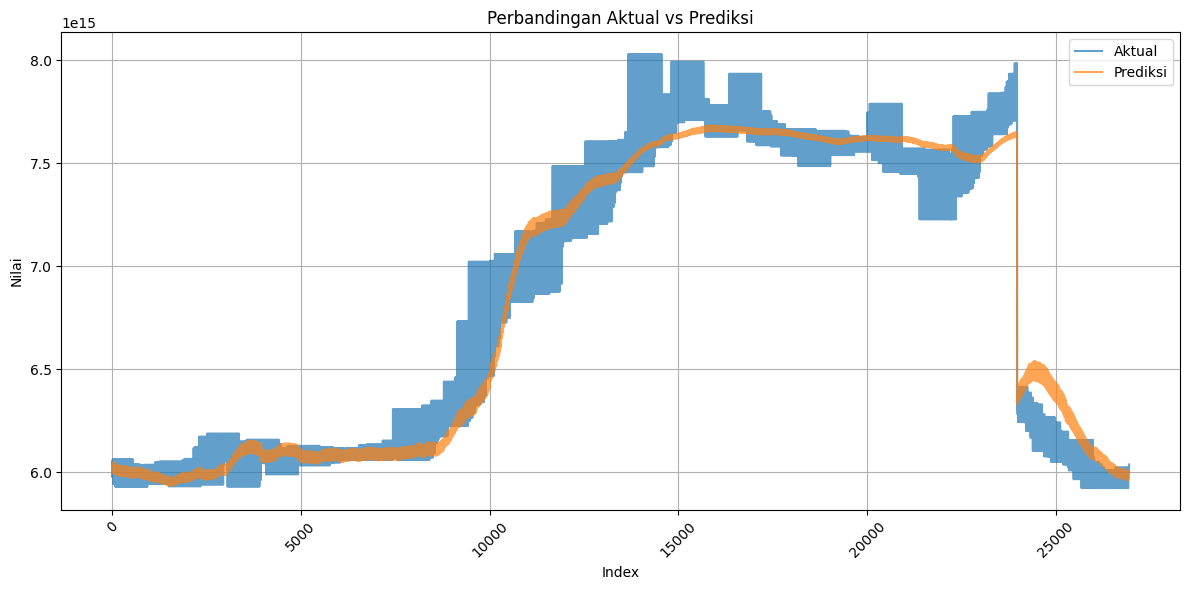

In [ ]:
metrics = evaluate_model(y_test, y_pred)